In [1]:
from random import sample
from pydub import AudioSegment
import wave
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as l
import librosa.display as l1
import scipy as sp
import math
import sklearn 

C:\Users\anand\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def generic_features(audio_file):
    '''
    Extract Audio generic features using pydub
    Input: file path
    Output:  
    Channels: number of channels: 1 for mono, 2 for stereo audio
    Sample width: number of bytes per sample; 1 means 8 bits, 2 means 16 bit
    Frame rate/ sample rate: frequency of sample used (in hertz)
    Frame width: number of bytes for each frame. one fram e contains a sample of each channel
    length: audio file length in millisecond
    frame count: number of frames from sample
    Intensity: loudness in dBFS (dB relative to maximum possible loudness.)
    '''
    audio_segment = AudioSegment.from_file(audio_file)
    audio_segment = AudioSegment.from_file(audio_file)
    # Returns the loudness of the AudioSegment in dBFS (db relative to the maximum possible loudness). 
    print("dBFS", audio_segment.dBFS)
    # Number of channels in this audio segment (1 means mono, 2 means stereo)
    print("Channels", audio_segment.channels)
    # Number of bytes in each sample (1 means 8 bit, 2 means 16 bit, etc)
    print("sample_width (no of bytes each sample",audio_segment.sample_width)
    # Frame_rate
    print("Frame_rate", audio_segment.frame_rate)
    # root mean square: A measure of loudness.
    print("RMS",audio_segment.rms)
    # Max: The highest amplitude of any sample in the AudioSegment.
    print("Max", audio_segment.max)
    # Max_amplitude: The highest amplitude of any sample in the AudioSegment
    print("Max_amplitude", audio_segment.max_dBFS)
    # duration in seconds
    print("Duration", audio_segment.duration_seconds)
    # frame_count: Returns the number of frames in the AudioSegment
    print("Frame_count", audio_segment.frame_count())
    # frame width
    print("frame width", audio_segment.frame_width)
    #length
    print("len", len(audio_segment))
    l=[audio_segment.channels, audio_segment.sample_width, audio_segment.frame_rate,
        audio_segment.frame_width,len(audio_segment),audio_segment.frame_count(),audio_segment.dBFS]
    return l


In [3]:
def amplitude_envelope(signal,framesize,hop_length):
    amplitude_envelope=[]
    for i in range(0,len(signal),hop_length):
        current_frame_ae=max(signal[i:i+framesize])
        amplitude_envelope.append(current_frame_ae)
    return np.array(amplitude_envelope)

In [4]:
def rms(signal, frame_size, hop_length):
    rms=[]
    for i in range(0,len(signal),hop_length):
        current_frame_rms=np.sqrt(np.sum(signal[i:i+frame_size]**2/frame_size))
        rms.append(current_frame_rms)
    return np.array(rms)


In [5]:
def plot_waveform(y0,y1,y2,y3):
    
    fig, axs = plt.subplots(figsize=(10,15),nrows=3, sharex=True)
    plt.suptitle("Waveform")
    l.display.waveshow(y0,ax=axs[0])
    axs[0].set(title="File: 00")

    l.display.waveshow(y1,ax=axs[1])
    axs[1].set(title="File: 01")

    l.display.waveshow(y2,ax=axs[2])
    axs[2].set(title="File: 02")

    l.display.waveshow(y3,ax=axs[3])
    axs[3].set(title="File: 03")
    plt.subplots_adjust(0.1)
    plt.show()

def plot_AE(y0,AE_0,y1,AE_1,y2,AE_2,y3,AE_3,hop_length):
    frames_0=range(0,AE_0.size)
    t_0=l.frames_to_time(frames_0,hop_length=hop_length)

    frames_1=range(0,AE_1.size)
    t_1=l.frames_to_time(frames_1,hop_length=hop_length)

    frames_2=range(0,AE_2.size)
    t_2=l.frames_to_time(frames_2,hop_length=hop_length)

    frames_3=range(0,AE_3.size)
    t_3=l.frames_to_time(frames_3,hop_length=hop_length)

    fig, axs = plt.subplots(figsize=(10,15),nrows=4, sharex=True)
    plt.suptitle("Amplitude Envelope")
    l.display.waveshow(y0,ax=axs[0])
    axs[0].plot(t_0,AE_0,color='r')
    axs[0].set(title="File: 00")

    l.display.waveshow(y1,ax=axs[1])
    axs[1].plot(t_1,AE_1,color='r')
    axs[1].set(title="File: 01")

    l.display.waveshow(y2,ax=axs[2])
    axs[2].plot(t_2,AE_2,color='r')
    axs[2].set(title="File: 02")

    l.display.waveshow(y3,ax=axs[3])
    axs[3].plot(t_3,AE_3,color='r')
    axs[3].set(title="File: 03")
    plt.subplots_adjust(0.1)
    plt.show()
    

def plot_rms(y0,rms_0,y1,rms_1,y2,rms_2,y3,rms_3,hop_length):
    frames_0=range(0,rms_0.size)
    t_0=l.frames_to_time(frames_0,hop_length=hop_length)

    frames_1=range(0,rms_1.size)
    t_1=l.frames_to_time(frames_1,hop_length=hop_length)

    frames_2=range(0,rms_2.size)
    t_2=l.frames_to_time(frames_2,hop_length=hop_length)

    frames_3=range(0,rms_3.size)
    t_3=l.frames_to_time(frames_3,hop_length=hop_length)

    fig, axs = plt.subplots(figsize=(10,15),nrows=4, sharex=True)
    plt.suptitle("Root mean square energy")
    l.display.waveshow(y0,ax=axs[0])
    axs[0].plot(t_0,rms_0,color='r')
    axs[0].set(title="File: 00")

    l.display.waveshow(y1,ax=axs[1])
    axs[1].plot(t_1,rms_1,color='r')
    axs[1].set(title="File: 01")

    l.display.waveshow(y2,ax=axs[2])
    axs[2].plot(t_2,rms_2,color='r')
    axs[2].set(title="File: 02")

    l.display.waveshow(y3,ax=axs[3])
    axs[3].plot(t_3,rms_3,color='r')
    axs[3].set(title="File: 03")
    plt.show()
    

def plot_zcr(zcr_0,zcr_1,zcr_2,zcr_3,frame_size,hop_length):
    frames_0=range(0,zcr_0.size)
    t_0=l.frames_to_time(frames_0,hop_length=hop_length)

    frames_1=range(0,zcr_1.size)
    t_1=l.frames_to_time(frames_1,hop_length=hop_length)

    frames_2=range(0,zcr_2.size)
    t_2=l.frames_to_time(frames_2,hop_length=hop_length)

    frames_3=range(0,zcr_3.size)
    t_3=l.frames_to_time(frames_3,hop_length=hop_length)

    fig, axs = plt.subplots(figsize=(10,15),nrows=4, sharex=True)
    plt.suptitle("Zero crossing rate")
    axs[0].plot(t_0,zcr_0*frame_size,color='r')
    axs[0].set(title="File: 00")
    axs[0].set_xlabel('Time')
    axs[1].plot(t_1,zcr_1*frame_size,color='r')
    axs[1].set(title="File: 01")
    axs[2].plot(t_2,zcr_2*frame_size,color='r')
    axs[2].set(title="File: 02")
    axs[3].plot(t_3,zcr_3*frame_size,color='r')
    axs[3].set(title="File: 03")
    plt.subplots_adjust(bottom=0.1)
    plt.show()

def plot_fft(ft_0,ft_1,ft_2,ft_3,sr0,sr1,sr2,sr3,frame_size):
    magnitude_0=np.absolute(ft_0)
    frequency_0=np.linspace(0,sr0,len(magnitude_0))

    magnitude_1=np.absolute(ft_1)
    frequency_1=np.linspace(0,sr1,len(magnitude_1))

    magnitude_2=np.absolute(ft_2)
    frequency_2=np.linspace(0,sr2,len(magnitude_2))

    magnitude_3=np.absolute(ft_3)
    frequency_3=np.linspace(0,sr3,len(magnitude_3))
    # print("F",frequency_0)
    # print("M",magnitude_0)
    # for closer look
    #num_frequency_bins=int(len(frequency)*0.001) #fratio=1
    fig, axs = plt.subplots(figsize=(10,15),nrows=4, sharex=True)
    plt.suptitle("Fast Fourier Transformation")
    axs[0].plot(frequency_0[0:100],magnitude_0[0:100]*frame_size,color='r')
    axs[0].set(title="File: 00")
    axs[1].plot(frequency_1,magnitude_1*frame_size,color='r')
    axs[1].set(title="File: 01")
    axs[2].plot(frequency_2,magnitude_2*frame_size,color='r')
    axs[2].set(title="File: 02")
    axs[3].plot(frequency_3,magnitude_3*frame_size,color='r')
    axs[3].set(title="File: 03")
    plt.show()

def plot_sc(sc_0,sc_1,sc_2,sc_3,hop_length):
    frames_0=range(0,sc_0.size)
    t_0=l.frames_to_time(frames_0,hop_length=hop_length)

    frames_1=range(0,sc_1.size)
    t_1=l.frames_to_time(frames_1,hop_length=hop_length)

    frames_2=range(0,sc_2.size)
    t_2=l.frames_to_time(frames_2,hop_length=hop_length)

    frames_3=range(0,sc_3.size)
    t_3=l.frames_to_time(frames_3,hop_length=hop_length)

    fig, axs = plt.subplots(figsize=(10,15),nrows=4, sharex=True)
    plt.suptitle("Spectral centroid")
    axs[0].plot(t_0,sc_0,color='r')
    axs[0].set(title="File: 00")
    axs[1].plot(t_0,sc_0,color='r')
    axs[1].set(title="File: 01")
    axs[2].plot(t_0,sc_0,color='r')
    axs[2].set(title="File: 02")
    axs[3].plot(t_0,sc_0,color='r')
    axs[3].set(title="File: 03")
    plt.show()

def plot_sb(sb_0,sb_1,sb_2,sb_3,hop_length):
    frames_0=range(0,sb_0.size)
    t_0=l.frames_to_time(frames_0,hop_length=hop_length)

    frames_1=range(0,sb_1.size)
    t_1=l.frames_to_time(frames_1,hop_length=hop_length)

    frames_2=range(0,sb_2.size)
    t_2=l.frames_to_time(frames_2,hop_length=hop_length)

    frames_3=range(0,sb_3.size)
    t_3=l.frames_to_time(frames_3,hop_length=hop_length)

    fig, axs = plt.subplots(figsize=(10,15),nrows=4, sharex=True)
    plt.suptitle("Spectral bandwidth")
    axs[0].plot(t_0,sb_0,color='r')
    axs[0].set(title="File: 00")
    axs[1].plot(t_0,sb_0,color='r')
    axs[1].set(title="File: 01")
    axs[2].plot(t_0,sb_0,color='r')
    axs[2].set(title="File: 02")
    axs[3].plot(t_0,sb_0,color='r')
    axs[3].set(title="File: 03")
    plt.show()

def plot_mel_spectrogram(log_mel_spectrogram_0,sr0,log_mel_spectrogram_1,sr1,log_mel_spectrogram_2,sr2,log_mel_spectrogram_3,sr3):
    
    fig, axs = plt.subplots(figsize=(10,15),nrows=4, sharex=True)
    plt.suptitle("MEL Spectrogram")
    img_0=l1.specshow(log_mel_spectrogram_0,sr=sr0,ax=axs[0])
    axs[0].set(title="File: 00")
    fig.colorbar(img_0, ax=axs[0])
    img_1=l1.specshow(log_mel_spectrogram_1,sr=sr1,ax=axs[1])
    axs[1].set(title="File: 01")
    fig.colorbar(img_1, ax=axs[1])
    img_2=l1.specshow(log_mel_spectrogram_2,sr=sr2,ax=axs[2])
    axs[2].set(title="File: 02")
    fig.colorbar(img_2, ax=axs[2])
    img_3=l1.specshow(log_mel_spectrogram_3,sr=sr3,ax=axs[3])
    fig.colorbar(img_3, ax=axs[3])
    axs[3].set(title="File: 03")
    plt.show()

def plot_mfcc(mfcc_0,mfcc_1,mfcc_2,mfcc_3):
    fig, axs = plt.subplots(figsize=(10,15),nrows=4, sharex=True)
    plt.suptitle("MFCC")
    img_0=l1.specshow(mfcc_0,ax=axs[0])
    axs[0].set(title="File: 00")
    fig.colorbar(img_0, ax=axs[0])
    img_1=l1.specshow(mfcc_1,ax=axs[1])
    axs[1].set(title="File: 01")
    fig.colorbar(img_1,ax=axs[1])
    img_2=l1.specshow(mfcc_2,ax=axs[2])
    axs[2].set(title="File: 02")
    fig.colorbar(img_2,ax=axs[2])
    img_3=l1.specshow(mfcc_3,ax=axs[3])
    axs[3].set(title="File: 03")
    fig.colorbar(img_3,ax=axs[3])
    plt.show()


In [6]:
frame_size=1024
hop_length=512

In [7]:
audio_data_00='Data/0_1_2021_06_17_090407_Sound_Pa_SF0000002,0000.wav'
audio_data_01='Data/1_1_2021_07_08_095523_Sound_Pa_SF0000002,0000.wav'
audio_data_02='Data/2_1_2021_08_05_120829_Sound_Pa_SF0000002,0000.wav'
audio_data_03='Data/3_1_2021_08_12_115910_Sound_Pa_SF0000002,0000.wav'


In [8]:
# Load function returns the audio time series and sampling rate
# Used default sampling rate =22050  
y0,sr0=l.load(audio_data_00)
y1,sr1=l.load(audio_data_01)
y2,sr2=l.load(audio_data_02)
y3,sr3=l.load(audio_data_03)

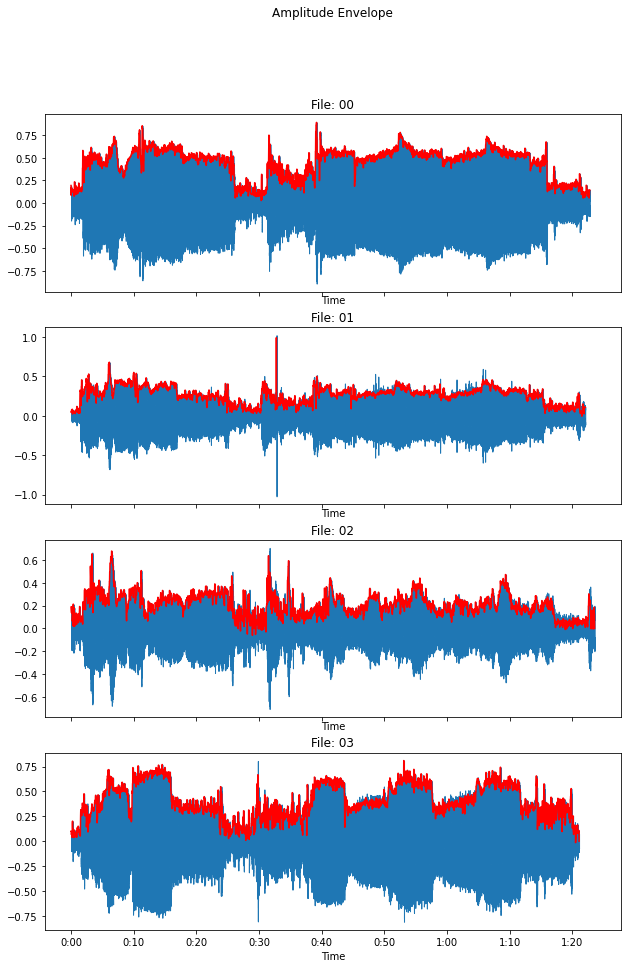

In [9]:
 # Amplitude envelope
AE_0=amplitude_envelope(y0,frame_size,hop_length)
AE_1=amplitude_envelope(y1,frame_size,hop_length)
AE_2=amplitude_envelope(y2,frame_size,hop_length)
AE_3=amplitude_envelope(y3,frame_size,hop_length)

plot_AE(y0,AE_0,y1,AE_1,y2,AE_2,y3,AE_3,hop_length)

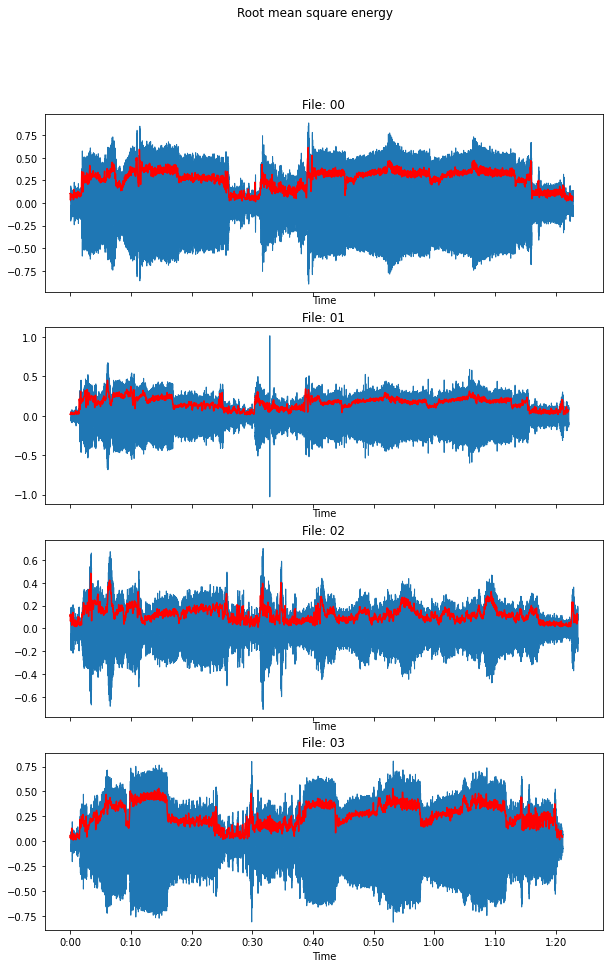

In [10]:
# Root mean square energy
# The root-mean-square here refers to the total magnitude of the signal, which in layman terms can be interpreted as the loudness or energy parameter of the audio file.
rms_0=l.feature.rms(y=y0,frame_length=frame_size,hop_length=hop_length)[0]
rms_1=l.feature.rms(y=y1,frame_length=frame_size,hop_length=hop_length)[0]
rms_2=l.feature.rms(y=y2,frame_length=frame_size,hop_length=hop_length)[0]
rms_3=l.feature.rms(y=y3,frame_length=frame_size,hop_length=hop_length)[0]
# rms=rms(y,frame_size, hop_length)
# print(rms.shape)
plot_rms(y0,rms_0,y1,rms_1,y2,rms_2,y3,rms_3,hop_length)

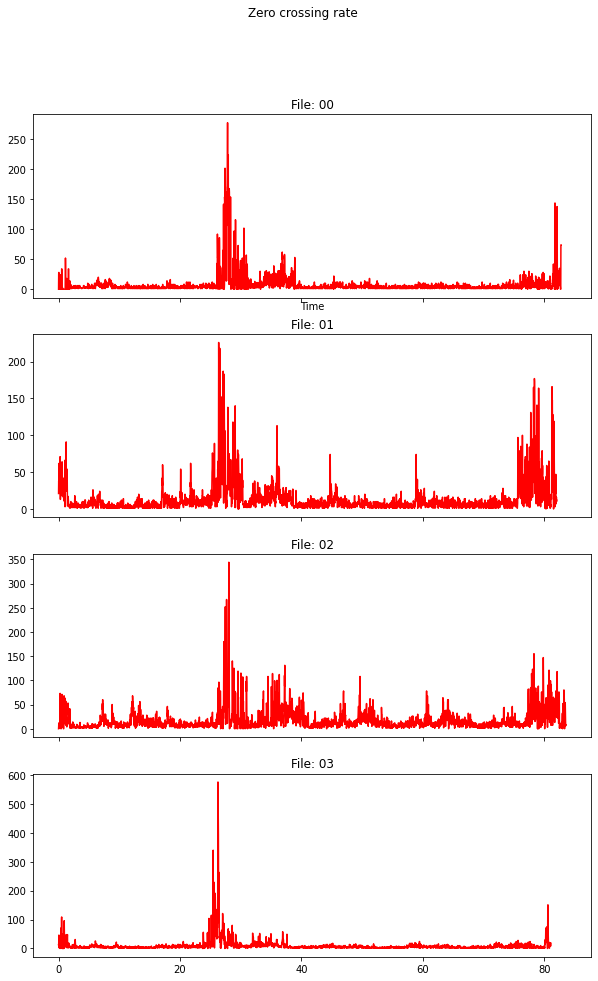

In [11]:
# zero-crossing-rate
# Zero crossing rate aims to study the rate in which a signal amplitude changes sign from positive to negative or back
zcr_0=l.feature.zero_crossing_rate(y=y0,frame_length=frame_size,hop_length=hop_length)[0]
zcr_1=l.feature.zero_crossing_rate(y=y1,frame_length=frame_size,hop_length=hop_length)[0]
zcr_2=l.feature.zero_crossing_rate(y=y2,frame_length=frame_size,hop_length=hop_length)[0]
zcr_3=l.feature.zero_crossing_rate(y=y3,frame_length=frame_size,hop_length=hop_length)[0]
# print(zcr.shape)
plot_zcr(zcr_0,zcr_1,zcr_2,zcr_3,frame_size,hop_length)


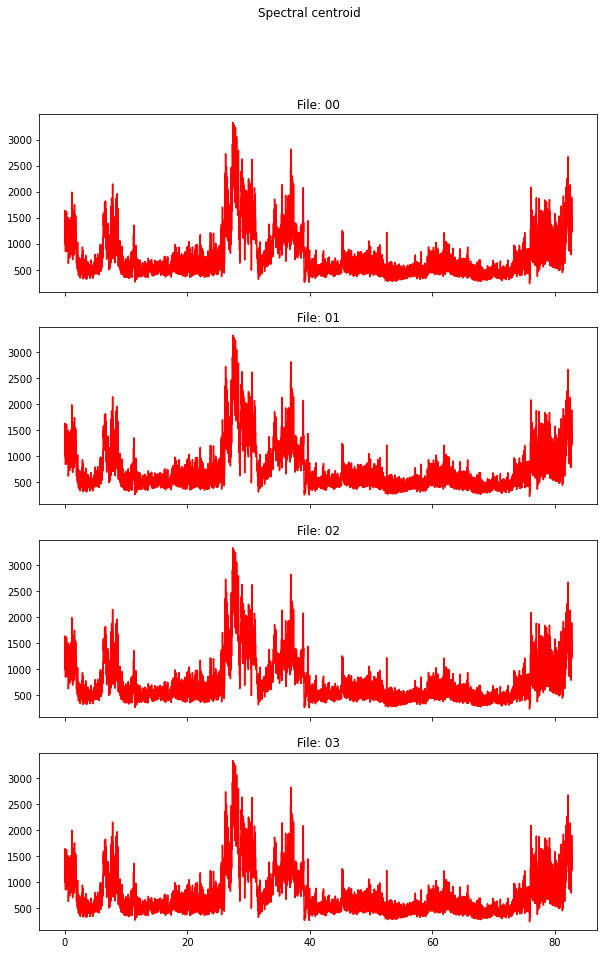

In [12]:
# Calculating Spectral centroid
# indicates where the centre of mass for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.
# If the frequencies in music are same throughout then spectral centroid would be around a centre and if there are high frequencies at the end of sound then the centroid would be towards its end.
sc_0=l.feature.spectral_centroid(y=y0, sr=sr0,n_fft=frame_size,hop_length=hop_length)[0]   
sc_1=l.feature.spectral_centroid(y=y1, sr=sr1,n_fft=frame_size,hop_length=hop_length)[0]  
sc_2=l.feature.spectral_centroid(y=y2, sr=sr2,n_fft=frame_size,hop_length=hop_length)[0]  
sc_3=l.feature.spectral_centroid(y=y3, sr=sr3,n_fft=frame_size,hop_length=hop_length)[0]     
plot_sc(sc_0,sc_1,sc_2,sc_3,hop_length)
    

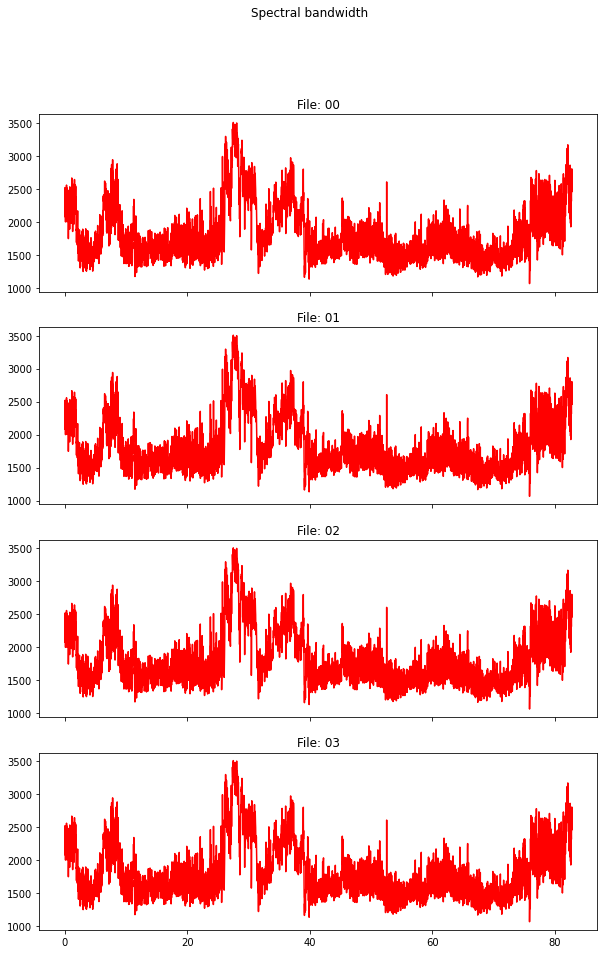

In [13]:
# Calculating Spectral bandwidth
sb_0=l.feature.spectral_bandwidth(y=y0, sr=sr0,n_fft=frame_size,hop_length=hop_length)[0]     
sb_1=l.feature.spectral_bandwidth(y=y1, sr=sr1,n_fft=frame_size,hop_length=hop_length)[0]    
sb_2=l.feature.spectral_bandwidth(y=y2, sr=sr2,n_fft=frame_size,hop_length=hop_length)[0]    
sb_3=l.feature.spectral_bandwidth(y=y3, sr=sr3,n_fft=frame_size,hop_length=hop_length)[0]    
    
plot_sb(sb_0,sb_1,sb_2,sb_3,hop_length)


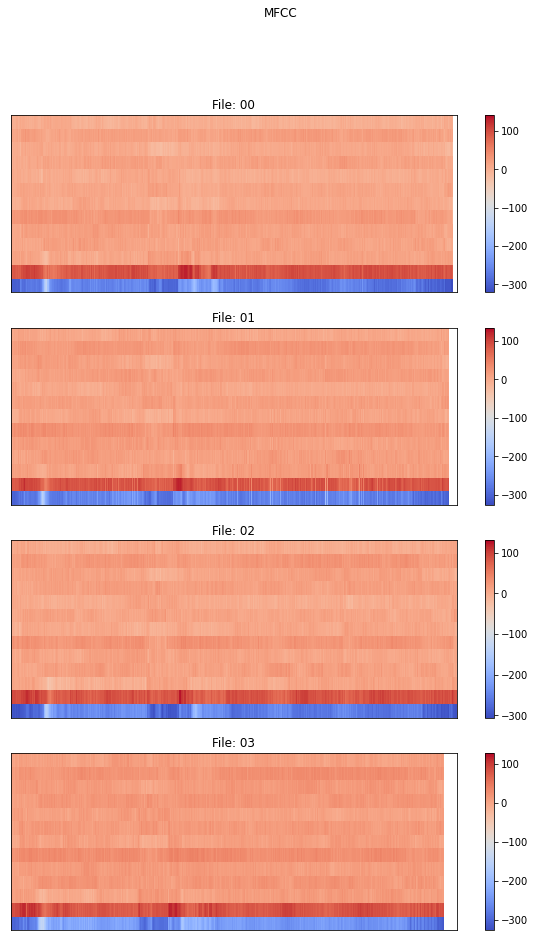

In [14]:
# Calculating MFCC
mfcc_0=l.feature.mfcc(y=y0,n_mfcc=13,sr=sr0)
mfcc_1=l.feature.mfcc(y=y1,n_mfcc=13,sr=sr1)
mfcc_2=l.feature.mfcc(y=y2,n_mfcc=13,sr=sr2)
mfcc_3=l.feature.mfcc(y=y3,n_mfcc=13,sr=sr3)

plot_mfcc(mfcc_0,mfcc_1,mfcc_2,mfcc_3)

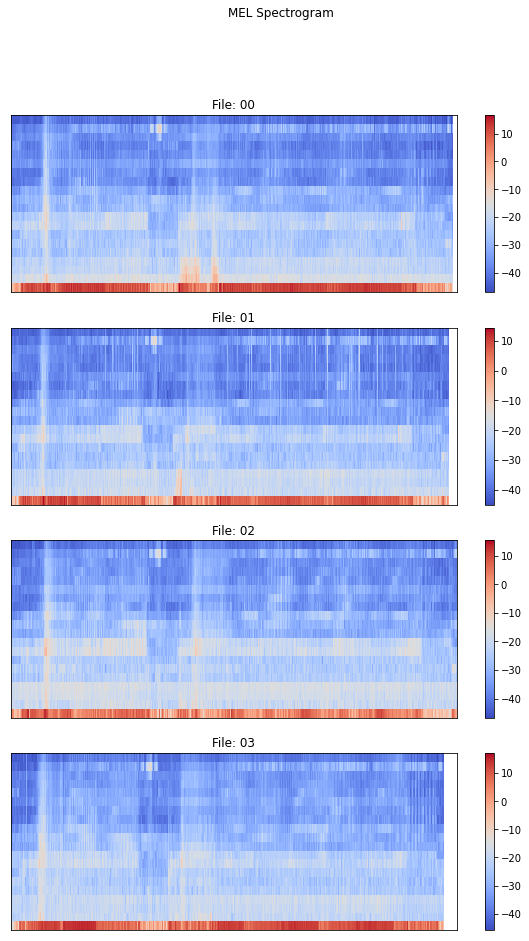

In [15]:
# Mel Spectrogram 
mel_spectrogram_0=l.feature.melspectrogram(y=y0,sr=sr0,n_fft=frame_size,hop_length=hop_length,n_mels=20)
log_mel_spectrogram_0=l.power_to_db(mel_spectrogram_0)

mel_spectrogram_1=l.feature.melspectrogram(y=y1,sr=sr1,n_fft=frame_size,hop_length=hop_length,n_mels=20)
log_mel_spectrogram_1=l.power_to_db(mel_spectrogram_1)

mel_spectrogram_2=l.feature.melspectrogram(y=y2,sr=sr2,n_fft=frame_size,hop_length=hop_length,n_mels=20)
log_mel_spectrogram_2=l.power_to_db(mel_spectrogram_2)
    
mel_spectrogram_3=l.feature.melspectrogram(y=y3,sr=sr3,n_fft=frame_size,hop_length=hop_length,n_mels=20)
log_mel_spectrogram_3=l.power_to_db(mel_spectrogram_3)
    
plot_mel_spectrogram(log_mel_spectrogram_0,sr0,log_mel_spectrogram_1,sr1,log_mel_spectrogram_2,sr2,log_mel_spectrogram_3,sr3)


[Text(0.5, 1.0, 'File: 00')]

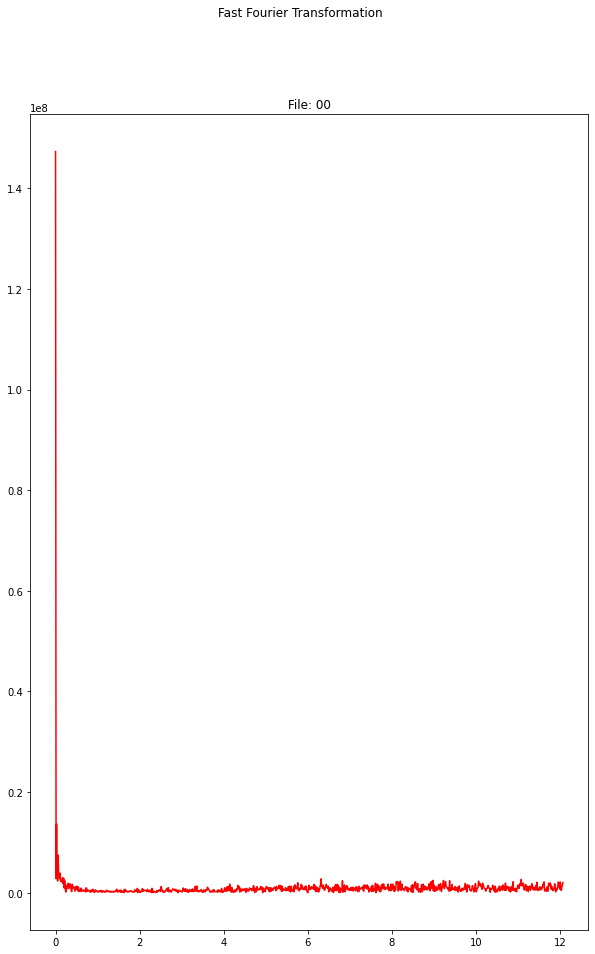

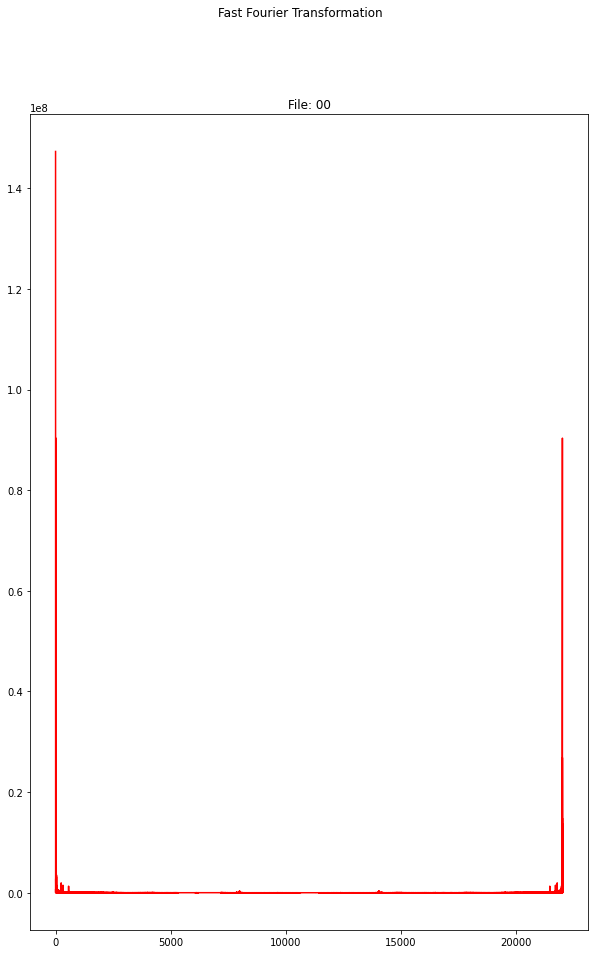

In [16]:
# fast fourier transform
ft_0=np.fft.fft(y0)
ft_1=np.fft.fft(y1)
ft_2=np.fft.fft(y2)
ft_3=np.fft.fft(y3)

# freqs = np.fft.fftfreq(len(y0))
# print(freqs.min(), freqs.max())

# # Find the peak in the coefficients
# idx = np.argmax(np.abs(y0))
# freq = freqs[idx]
# freq_in_hertz = abs(freq * sr0)
# print(freq_in_hertz)
# plot_fft(ft_0,ft_1,ft_2,ft_3,sr0,sr1,sr2,sr3,frame_size)

magnitude_0=np.absolute(ft_0)
frequency_0=np.linspace(0,sr3,len(magnitude_0))
    # print("F",frequency_0)
    # print("M",magnitude_0)
    # for closer look
    #num_frequency_bins=int(len(frequency)*0.001) #fratio=1
fig, axs = plt.subplots(figsize=(10,15),nrows=1, sharex=True)
plt.suptitle("Fast Fourier Transformation")
axs.plot(frequency_0[0:1000],magnitude_0[0:1000]*frame_size,color='r')
axs.set(title="File: 00")

fig, axs = plt.subplots(figsize=(10,15),nrows=1, sharex=True)
plt.suptitle("Fast Fourier Transformation")
axs.plot(frequency_0,magnitude_0*frame_size,color='r')
axs.set(title="File: 00")

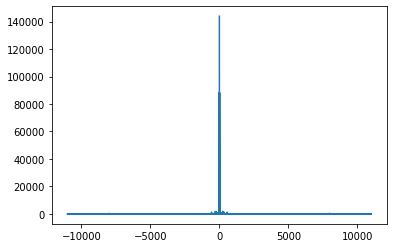

In [17]:
Xf_mag = np.abs(np.fft.fft(y0))
#Each index of the Xf_mag array will then contain the amplitude of a frequency bin whose frequency is given by index * fs/len(Xf_mag). These frequencies can be conveniently computed using:

freqs = np.fft.fftfreq(len(Xf_mag), d=1.0/sr0)
#Finally the spectrum could be plotted using matplotlib:

plt.plot(freqs, Xf_mag)
